## Task: Extraction de données via OCR


For achieving the giving task we adopted methodology that based on **integrating OCR tool** having the image as input and extracting the texts from the image (with at least the names of the cities of Genoa and Camaldoli), **the location of these text fields (bounding boxes)** on the image and the **confidence rates associated with the text** extraction/recognition process.

**Finally The output is in JSON format.**

This proposed solution will work as way of chatting with our png satillate picture and get the infromations from it

## Imports for Zephyr-7B

Why and what is Zephyr ?

- Zephyr is an llm that trained to act as an assistants.
- Zephyr-7B-β is the second model in a series of llms, and is a fine-tuned version of "mistralai/Mistral-7B-v0.1".

Model description
- Model type: A 7B parameter GPT-like model fine-tuned on a mix of publicly available, synthetic datasets.
- Language(s) (NLP): Primarily English
- License: MIT
- Finetuned from model: mistralai/Mistral-7B-v0.1

[Link to the Huggingface for more infos](https://huggingface.co/HuggingFaceH4/zephyr-7b-beta)

In [1]:
# Install transformers from source - only needed for versions <= v4.34
%pip install -q git+https://github.com/huggingface/transformers.git
# accelerate will help us with accelarating the infrence and using it as map_device param in the transformers pipeline
# goal is to make it use multi gpu and accelerate the Zephyr-7B inference
%pip install -q accelerate

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.6/302.6 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 54.6 MB/s eta 0:00:00


## Imports for PaddleOCR
For the OCR component, we will use PaddleOCR. This toolkit, built on the PaddlePaddle framework it offers a comprehensive suite of tools for text recognition and detection.

In [2]:
#Only needed for Google Collab, Ignore if running in local machine
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

#Cloning the github repo to get the PaddlePaddle OCR Tool

In [3]:
!git clone https://github.com/PaddlePaddle/PaddleOCR.git

Cloning into 'PaddleOCR'...
remote: Enumerating objects: 48998, done.
remote: Counting objects: 100% (227/227), done.
remote: Compressing objects: 100% (185/185), done.
remote: Total 48998 (delta 59), reused 164 (delta 41), pack-reused 48771
Receiving objects: 100% (48998/48998), 346.03 MiB | 22.03 MiB/s, done.
Resolving deltas: 100% (34586/34586), done.
Updating files: 100% (1811/1811), done.


## Installing the Tools (you will get folder in the collab notebook resulted form cloning and the next instruction will install the requirements

In [4]:
!python3 -m pip install -q paddlepaddle-gpu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 758.9/758.9 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.2 MB/s eta 0:00:00


In [5]:
!pip install -q "paddleocr>=2.0.1"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.0/780.0 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.2/299.2 kB 31.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 54.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 30.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 MB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 35.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 12.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 73.0 MB/s 

## OCR using PaddleOCR

In [6]:
from paddleocr import PaddleOCR,draw_ocr
# Paddleocr supports Chinese, English, French, German, Korean and Japanese.
# You can set the parameter `lang` as `ch`, `en`, `fr`, `german`, `korean`, `japan`
# to switch the language model in order.
ocr = PaddleOCR(use_angle_cls=True, lang='en',use_space_char=True,show_log=False,enable_mkldnn=True)

download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_det_infer.tar to /root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer/en_PP-OCRv3_det_infer.tar


100%|██████████| 4.00M/4.00M [00:14<00:00, 268kiB/s] 


download https://paddleocr.bj.bcebos.com/PP-OCRv4/english/en_PP-OCRv4_rec_infer.tar to /root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer/en_PP-OCRv4_rec_infer.tar


100%|██████████| 10.2M/10.2M [00:10<00:00, 954kiB/s] 


download https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar to /root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer/ch_ppocr_mobile_v2.0_cls_infer.tar


100%|██████████| 2.19M/2.19M [00:14<00:00, 154kiB/s]


# Viz the Image

In [7]:
from google.colab.patches import cv2_imshow
import cv2

# Make sure you have the image in the collab notebook uploaded  

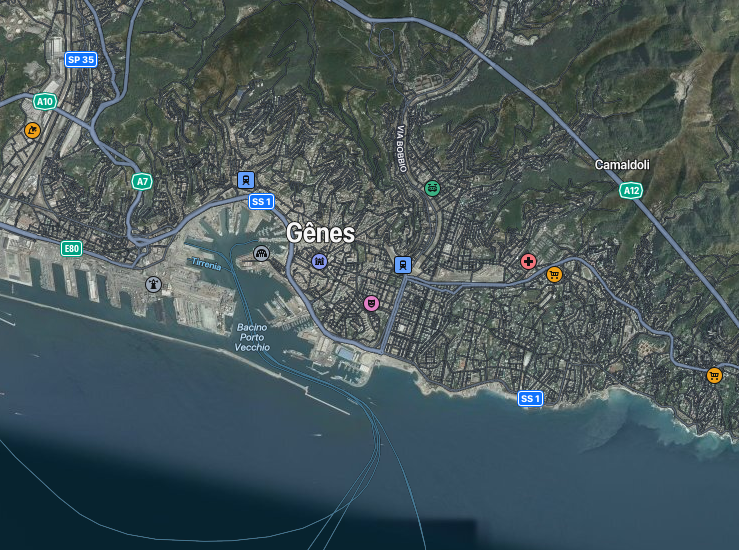

In [9]:
img_path = '/content/Genova.png'

img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

# Getting the ocr results

In [10]:
result = ocr.ocr(img_path, cls=True)

# We will keep the result list as it is for the next steps but for Viz we decided to creat pands df to better view the content returned and better visibility

In [18]:
result

[[[[[64.0, 53.0], [96.0, 53.0], [96.0, 67.0], [64.0, 67.0]],
   ('SP 35', 0.9286751747131348)],
  [[[33.0, 95.0], [55.0, 95.0], [55.0, 107.0], [33.0, 107.0]],
   ('A10', 0.9804956316947937)],
  [[[594.0, 158.0], [650.0, 158.0], [650.0, 172.0], [594.0, 172.0]],
   ('Camaldoli', 0.9610521793365479)],
  [[[134.0, 174.0], [150.0, 174.0], [150.0, 187.0], [134.0, 187.0]],
   ('A7', 0.9942327737808228)],
  [[[619.0, 182.0], [644.0, 182.0], [644.0, 198.0], [619.0, 198.0]],
   ('A12', 0.9840205311775208)],
  [[[249.0, 194.0], [274.0, 194.0], [274.0, 209.0], [249.0, 209.0]],
   ('ss1', 0.9754376411437988)],
  [[[286.0, 220.0], [356.0, 225.0], [354.0, 247.0], [285.0, 242.0]],
   ('Genes', 0.9977563619613647)],
  [[[63.0, 244.0], [78.0, 244.0], [78.0, 252.0], [63.0, 252.0]],
   ('E80', 0.9616994261741638)],
  [[[190.0, 255.0], [221.0, 262.0], [219.0, 270.0], [188.0, 262.0]],
   ('Tirreni', 0.8696781992912292)],
  [[[524.0, 257.0], [535.0, 257.0], [535.0, 267.0], [524.0, 267.0]],
   ('+', 0.8917492

In [20]:
import pandas as pd

# Flatten the list and prepare data for DataFrame
flattened_data = []
for sublist in result:
    for item in sublist:
        flattened_data.append({'coordinates': item[0], 'label': item[1][0], 'confidence': item[1][1]})

# Create DataFrame
df = pd.DataFrame(flattened_data)
df.head()

,coordinates,label,confidence
0,"[[64.0, 53.0], [96.0, 53.0], [96.0, 67.0], [64...",SP 35,0.928675
1,"[[33.0, 95.0], [55.0, 95.0], [55.0, 107.0], [3...",A10,0.980496
2,"[[594.0, 158.0], [650.0, 158.0], [650.0, 172.0...",Camaldoli,0.961052
3,"[[134.0, 174.0], [150.0, 174.0], [150.0, 187.0...",A7,0.994233
4,"[[619.0, 182.0], [644.0, 182.0], [644.0, 198.0...",A12,0.984021


In [21]:
ocr_string = ""
# Extracting the text from the OCR result and concatenate it to ocr_string
for i in range(len(result[0])):
    ocr_string = ocr_string + result[0][i][1][0] + " "

# Now after looping throw the list and getting the extracted text we append it to empty string

In [22]:
ocr_string

'SP 35 A10 Camaldoli A7 A12 ss1 Genes E80 Tirreni + e Bacino Vecchio Porto SS1 '

## OCR Output Parsing using LLM

In [23]:
import torch
from transformers import pipeline

In [24]:
pipe = pipeline("text-generation", model="HuggingFaceH4/zephyr-7b-alpha", torch_dtype=torch.bfloat16, device_map="auto")

config.json:   0%|          | 0.00/628 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

model-00001-of-00008.safetensors:   0%|          | 0.00/1.89G [00:00<?, ?B/s]

model-00002-of-00008.safetensors:   0%|          | 0.00/1.95G [00:00<?, ?B/s]

model-00003-of-00008.safetensors:   0%|          | 0.00/1.98G [00:00<?, ?B/s]

model-00004-of-00008.safetensors:   0%|          | 0.00/1.95G [00:00<?, ?B/s]

model-00005-of-00008.safetensors:   0%|          | 0.00/1.98G [00:00<?, ?B/s]

model-00006-of-00008.safetensors:   0%|          | 0.00/1.95G [00:00<?, ?B/s]

model-00007-of-00008.safetensors:   0%|          | 0.00/1.98G [00:00<?, ?B/s]

model-00008-of-00008.safetensors:   0%|          | 0.00/816M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/8 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/111 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.43k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/168 [00:00<?, ?B/s]

# Each message can have 1 of 3 roles: "system" (to provide initial instructions), "user", or "assistant".
##For inference, make sure "user" is the role in the final message.


In [41]:
# Each message can have 1 of 3 roles: "system" (to provide initial instructions), "user", or "assistant". For inference, make sure "user" is the role in the final message.
messages = [
    {
        "role": "system",
        "content": "You are a JSON converter which receives raw boarding pass OCR information as a string and returns a structured JSON output by organising the information in the string.",
    },
    {"role": "user", "content": f"Extract the name of all the Cities this OCR data: {ocr_string}"},
]

## We use the tokenizer's chat template to format each message
* [Templates for Chat Models](https://huggingface.co/docs/transformers/main/en/chat_templating)

In [42]:
# We use the tokenizer's chat template to format each message - see https://huggingface.co/docs/transformers/main/en/chat_templating
prompt = pipe.tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)
print(prompt)

<|system|>
You are a JSON converter which receives raw boarding pass OCR information as a string and returns a structured JSON output by organising the information in the string.</s>
<|user|>
Extract the name of all the Cities this OCR data: SP 35 A10 Camaldoli A7 A12 ss1 Genes E80 Tirreni + e Bacino Vecchio Porto SS1 </s>
<|assistant|>



# Results

In [43]:
outputs = pipe(prompt, max_new_tokens=250, do_sample=True,  temperature=0.7, top_k=50, top_p=0.95)
print(outputs[0]["generated_text"])

<|system|>
You are a JSON converter which receives raw boarding pass OCR information as a string and returns a structured JSON output by organising the information in the string.</s>
<|user|>
Extract the name of all the Cities this OCR data: SP 35 A10 Camaldoli A7 A12 ss1 Genes E80 Tirreni + e Bacino Vecchio Porto SS1 </s>
<|assistant|>
Here's an example JSON output for the given OCR data:

```
{
  "Cities": [
    "Camaldoli",
    "Genes",
    "Tirreni",
    "Porto"
  ]
}
```

Explanation:

1. The JSON object has a key `Cities` which is an array containing the names of the cities extracted from the given OCR data.

2. The OCR data in this case has four cities separated by spaces.

3. The first city is `Camaldoli`, which is the first substring that can be recognized as a city name.

4. The second city is `Genes`, which is the next substring that can be recognized as a city name.

5. The third city is `Tirreni`, which is the next substring that can be recognized as a city name.

6. The f